In [45]:
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [16]:
#resize all images
Image_size = [224, 224] #this what imagenet architecture follows
train_path = 'Datasets/train'
test_path = 'Datasets/test'


In [7]:
# import resnet50  and add preprocessing layer to front of resnet50
# here we donot initialize weights, instead we used weights of imagenet

resnet = ResNet50(input_shape = Image_size + [3], weights = 'imagenet', include_top = False) #[3] for RGB

94773248/94765736 [==============================] - 28s 0us/step


In [10]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [11]:
# dont train any existing weights

for layers in resnet.layers:
    layers.trainable = False

In [21]:
# use glob to tell how many categories or folders (output) are present

folders =  glob('Datasets/train/*')

In [22]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [23]:
# flatten the output (basically making it one dimensional)

x = Flatten()(resnet.output)

In [24]:
output = Dense(len(folders), activation = 'softmax')(x)

# create a model

model = Model(inputs = resnet.inputs, outputs = output )

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [27]:
# Compile

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [28]:
# use imgae data generator to perform data augumentation

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                  )
test_datagen = ImageDataGenerator(rescale = 1./255)

In [29]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224,224),
                                                 class_mode = 'categorical',
                                                 batch_size = 32                                    
                                                )

Found 64 images belonging to 3 classes.


In [31]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                                 target_size = (224,224),
                                                 class_mode = 'categorical',
                                                 batch_size = 32                                    
                                                )

Found 58 images belonging to 3 classes.


In [33]:
# fit the model

r = model.fit_generator(training_set,
                        validation_data = test_set,
                        epochs = 50,
                        steps_per_epoch = len(training_set),
                        validation_steps = len(test_set),
                        verbose = 1
                       
                       )

C:\Users\rajiv\anaconda3\envs\py3-TF2.0\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 12s 6s/step - loss: 4.2459 - accuracy: 0.3542 - val_loss: 6.3641 - val_accuracy: 0.1724
Epoch 2/50
2/2 [==============================] - 6s 4s/step - loss: 5.2728 - accuracy: 0.3750 - val_loss: 3.5539 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 6s 5s/step - loss: 3.1842 - accuracy: 0.3854 - val_loss: 5.3859 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 6s 4s/step - loss: 3.1394 - accuracy: 0.4167 - val_loss: 1.0955 - val_accuracy: 0.5000
Epoch 5/50
2/2 [==============================] - 6s 4s/step - loss: 1.5195 - accuracy: 0.5000 - val_loss: 1.7161 - val_accuracy: 0.5690
Epoch 6/50
2/2 [==============================] - 7s 5s/step - loss: 1.6745 - accuracy: 0.4896 - val_loss: 1.8495 - val_accuracy: 0.3103
Epoch 7/50
2/2 [==============================] - 6s 4s/step - loss: 1.2611 - accuracy: 0.5104 - val_loss: 1.5582 - val_accuracy: 0.3276
Epoch 8/50
2/2 [========================

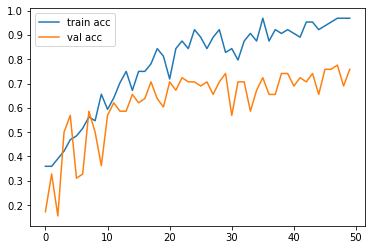

In [34]:
plt.plot(r.history['accuracy'], label = 'train acc')
plt.plot(r.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()

In [35]:
# save the model as h5 file

model.save('model_resnet50.h5')

In [36]:
y_pred = model.predict(test_set)

In [37]:
y_pred

array([[1.86173365e-01, 4.38871801e-01, 3.74954820e-01],
       [7.21214747e-04, 8.06922734e-01, 1.92356050e-01],
       [2.35946216e-02, 2.39132106e-01, 7.37273276e-01],
       [4.77267615e-03, 9.50539708e-01, 4.46876809e-02],
       [2.67408155e-02, 8.61059248e-01, 1.12199984e-01],
       [5.49001992e-02, 9.21879768e-01, 2.32200455e-02],
       [4.27973969e-03, 3.02859880e-02, 9.65434253e-01],
       [7.59162247e-01, 1.27884941e-02, 2.28049204e-01],
       [1.15592638e-02, 2.16030749e-03, 9.86280441e-01],
       [1.42374843e-01, 6.75620675e-01, 1.82004422e-01],
       [2.25188304e-02, 7.70923674e-01, 2.06557438e-01],
       [1.31713301e-02, 7.56353259e-01, 2.30475441e-01],
       [3.15726101e-02, 3.41269275e-04, 9.68086183e-01],
       [1.65442452e-01, 5.31685472e-01, 3.02872092e-01],
       [8.02110970e-01, 1.92234412e-01, 5.65466937e-03],
       [7.34049036e-06, 1.80051065e-04, 9.99812663e-01],
       [2.80441629e-04, 9.84267294e-01, 1.54522713e-02],
       [4.86981757e-02, 5.20242

In [38]:
len(y_pred)

58

In [40]:
y_pred = np.argmax(y_pred, axis = 1)
y_pred

array([1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 2,
       1, 1, 2, 1, 2, 2, 0, 2, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 2, 1, 1, 0,
       2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2], dtype=int64)

In [66]:
# Load the model

model = load_model('model_resnet50.h5')

In [67]:
img = image.load_img('Datasets/Test/lamborghini/11.jpg', target_size = (224,224))

In [68]:
img_arr = image.img_to_array(img)
img_arr

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [69]:
img_arr.shape

(224, 224, 3)

In [70]:
scaled_img = img_arr/255
scaled_img

array([[[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.76862746, 0.73333335, 0.6745098 ],
        [0.8509804 , 0.8156863 , 0.75686276],
        [0.9529412 , 0.91764706, 0.85882354]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.9607843 , 0.9607843 , 0.92941177],
        [0.9529412 , 0.9529412 , 0.92156863],
        [0.9490196 , 0.9490196 , 0.91764706]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.9411765 , 0.9764706 , 0.972549  ],
        [0.9490196 , 0.9843137 , 0.98039216],
        [0.9490196 , 0.9843137 , 0.98039216]],

       ...,

       [[0.7411765 , 0.8117647 , 0.8980392 ],
        [0.74509805, 0.80784315, 0.8980392 ],
        [0.74509805, 0

In [71]:
x = np.expand_dims(scaled_img, axis = 0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [72]:
model.predict(img_data)

array([[0.00190423, 0.00248214, 0.9956136 ]], dtype=float32)

In [73]:
prediction_category = np.argmax(model.predict(img_data), axis =1)

In [74]:
prediction_category

array([2], dtype=int64)